# Structure probing method comparison

Here we compare the results of four studies that reported full-length SARS-CoV-2 secondary structures based on in-cell structure probing data.

In short, cells infected with SARS-CoV-2 were probed with a structure probing reagent. Then, sites of chemical adducts were encoded in cDNA libaries and sequenced. Chemical reactivity is estimated using a bioinformatic pipeline. Structure prediction is performed using chemical reactivity as restraints. All four studies differed in the details of each of these steps. Refer to Table S1 for the differences between these experiments.

For each publication, per-nucleotide reactivities and secondary structure models were downloaded from the original publications with one exception. The full-length structure model from Sun et al. was not attached in the original publication, but was found in the supplemental data from Lan et al.

In addition, we performed our own structure modelling, using RNAstructure Fold, of the first 8000 nucleotides of SARS-CoV-2, with a max pairing distance of 300 (`--md 300`) and without chemical probing data.

Our *de novo* structure model:

- Files and commands (RNAvigate_figures/interactive_notebooks/figure_6/denovo_model)
- Structure model [file](./denovo_model/sars_1_8000_md300.ct)

Manfredonia et al. 2020 [link](https://doi.org/10.1093/nar/gkaa1053)

- Data set website [link](http://www.incarnatolab.com/datasets/SARS_Manfredonia_2020.php)
- Reactivity data [file download](http://www.incarnatolab.com/downloads/datasets/SARS_Manfredonia_2020/XML.tar.gz)
- Structure model [file download](http://www.incarnatolab.com/downloads/datasets/SARS_Manfredonia_2020/Structure_models.tar.gz)

Sun et al. 2021 [link](https://doi.org/10.1016/j.cell.2021.02.008)

- Reactivity data [file download](https://www.cell.com/cms/10.1016/j.cell.2021.02.008/attachment/62b49a27-68e7-44bc-ab12-2a0fc9705938/mmc2.xlsx)

Lan et al. 2022 [link](https://doi.org/10.1038/s41467-022-28603-2)

- Structure model [file download](https://static-content.springer.com/esm/art%3A10.1038%2Fs41467-022-28603-2/MediaObjects/41467_2022_28603_MOESM10_ESM.txt)
- Reactivity data [file download](https://static-content.springer.com/esm/art%3A10.1038%2Fs41467-022-28603-2/MediaObjects/41467_2022_28603_MOESM9_ESM.xlsx)
- Supplemental data file containing Sun et al. structure model [file download](https://static-content.springer.com/esm/art%3A10.1038%2Fs41467-022-28603-2/MediaObjects/41467_2022_28603_MOESM13_ESM.xlsx)

Huston et al. 2021 [link](https://doi.org/10.1016/j.molcel.2020.12.041)

- Github repo [link](https://github.com/pylelab/SARS-CoV-2_SHAPE_MaP_structure/tree/11ab13d34fc19e2b8892b06e5efdefad790d38ad)
- Reactivity data [file download](https://github.com/pylelab/SARS-CoV-2_SHAPE_MaP_structure/blob/11ab13d34fc19e2b8892b06e5efdefad790d38ad/SHAPE-MaP_data/SARS-CoV-2_SHAPE_Reactivity.txt)
- Structure model [file download](https://github.com/pylelab/SARS-CoV-2_SHAPE_MaP_structure/blob/11ab13d34fc19e2b8892b06e5efdefad790d38ad/SHAPE-MaP_data/SARS-CoV-2_Full_Length_Secondary_Structure_Map.ct)


## Import RNAvigate

The first step in this notebook is to import the necessary Python modules: RNAvigate and Pandas. Pandas is needed to load Excel files into RNAvigate.

In [1]:
import rnavigate as rnav
import pandas as pd

# this prevents wordwrap, which we'll need later to inspect a very long sequence.
from IPython.core.display import display, HTML
display(HTML("<style>div.output_area pre {white-space: pre;}</style>"))


## Define samples and provide input file names

Next, data files are loaded into RNAvigate samples, and assigned data keywords.

- `shapemap` stores SHAPE-MaP, icSHAPE, or DMS-MaPseq data depending on the study.
- `ss` stores the secondary structure model from each study.

We create one sample for each study (`lan`, `huston`, `manfredonia`, and `sun`),
and one sample to hold our no-data model (`de_novo`).

RNAvigate does not natively accept Excel files. Instead, Pandas is used to create DataFrames, which are accepted, from the Excel files. This requires only one extra python function.

In [2]:
de_novo = rnav.Sample(
    sample="1-8000, max distance 300",
    ss="./denovo_model/sars_1_8000_md300.ct")

huston = rnav.Sample(
    sample="Huston et al.",
    shapemap="./Huston_etal_2021/SARS-CoV-2_SHAPE_Reactivity.map",
    ss="./Huston_etal_2021/SARS-CoV-2_Full_Length_Secondary_Structure_Map.ct")

manfredonia = rnav.Sample(
     sample="Manfredonia et al.",
     shapemap={
         "shapemap_rnaframework": "./Manfredonia_etal_2020/SHAPE_invivo/SHAPE_invivo.xml"
         },
     ss="./Manfredonia_etal_2020/SHAPE_invivo/SARS-CoV-2.db")

lan_profile_df = pd.read_excel(
    io="./Lan_etal_2022/population_reactivities.xlsx",
    sheet_name="mus",
    usecols=[0, 1, 3],
    names=["Nucleotide", "Sequence", "Norm_profile"])

lan = rnav.Sample(
    sample="Lan et al.",
    shapemap=lan_profile_df,
    ss="./Lan_etal_2022/vero.ct")

sun_profile_df = pd.read_excel(
    io="./Sun_etal_2021/mmc2.xlsx",
    sheet_name="SARS2-invivo",
    usecols=[0, 1, 2],
    names=["Nucleotide", "Sequence", "Norm_profile"],
    dtype={
        "Nucleotide": "Int32",
        "Sequence": "string",
        "Norm_profile": "float32"}
    )

sun_ss_df = pd.read_excel(
    io="./Lan_etal_2022/all_figure_data.xlsx",
    sheet_name="Figure S5",
    usecols=[0, 13],
    names=["Nucleotide", "Pair"],
    nrows=21289,
    skiprows=5,
    dtype={
        "Nucleotide": "Int32",
        "Pair": "Int32"})

pairs_list = [(nt, pair_nt) for _, (nt, pair_nt) in sun_ss_df.iterrows()]

sun = rnav.Sample(
    sample="Sun et al.",
    shapemap=sun_profile_df,
    ss={'ss_pairs': pairs_list, 'sequence': 'shapemap'}
    )


## Making some changes to the data

Some of the loaded file formats specify DNA alphabet sequences and may contain lowercase letters. Here, all associated sequences are converted to an uppercase RNA alphabet.

Lan et al. profile data were provided as raw mutation rates. Here, DMS data are renormalized with a standard mutation rate correction for DMS-MaP data.

In [3]:
# Make sure that all sequences are RNA alphabet and uppercase
for sample in [lan, huston, manfredonia, sun, de_novo]:
    for data_keyword in ['shapemap', 'ss']:
        if data_keyword not in sample.data:
            continue
        sample.get_data(data_keyword).normalize_sequence(
            t_or_u='U',
            uppercase=True,
            )

# Perform DMS normalization for DMS samples
lan.get_data('shapemap').normalize(
    norm_method='percentiles',
    nt_groups=['A','C']
    );


## Check sequence alignments

We don't know what base sequences are being used, and if they differ positionally from each other.
RNAvigate's SequenceChecker analysis can be used to display this information.
In this first step, SequenceChecker is used to write a fasta file for input into ClustalOmega ([link](https://www.ebi.ac.uk/Tools/msa/clustalo/)) to obtain a multiple sequence alignment.

In [4]:
seq_check = rnav.analysis.SequenceChecker(samples=[lan, huston, manfredonia, sun, de_novo])
seq_check.write_fasta('sequences.fa')


## Check sequence alignments (continued)

In this next step, the sequence alignment file from the previous step is loaded into RNAvigate using `rnav.data.set_multiple_sequence_alignment`.
Whenever data is compared between these samples, they are first positionally aligned using this alignment.
RNAvigate can perform it's own pairwise alignment, but it is computationally expensive for this 29 kb RNA sequence.

Then, the SequenceChecker analysis created in the previous step can display all samples and data keywords and which sequences they contain, as well as the multiple sequence alignment.


In [5]:
base_seq = rnav.data.set_multiple_sequence_alignment('alignments.fa', set_pairwise=True)
seq_check.print_which_sequences()
seq_check.print_mulitple_sequence_alignment(base_seq)


Sequence IDs
    Lan et al.
        ss         0
        shapemap   0.0
    Huston et al.
        ss         1
        shapemap   1.0
    Manfredonia et al.
        ss         2
        shapemap   3.0
    Sun et al.
        ss         1
        shapemap   1.0
    1-8000, max distance 300
        ss         4

Multiple sequence alignment
    ID    length   alignment
    0     29882    AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGUAGAUCUGUUCUCUAAACGAACUUUAAAAUCUGUGUGGCUGUCACUCGGCUGCAUGCUUAGUGCACUCACGCAGUAUAAUUAAUAACUAAUUACUGUCGUUGACAGGACACGAGUAACUCGUCUAUCUUCUGCAGGCUGCUUACGGUUUCGUCCGUGUUGCAGCCGAUCAUCAGCACAUCUAGGUUUCGUCCGGGUGUGACCGAAAGGUAAGAUGGAGAGCCUUGUCCCUGGUUUCAACGAGAAAACACACGUCCAACUCAGUUUGCCUGUUUUACAGGUUCGCGACGUGCUCGUACGUGGCUUUGGAGACUCCGUGGAGGAGGUCUUAUCAGAGGCACGUCAACAUCUUAAAGAUGGCACUUGUGGCUUAGUAGAAGUUGAAAAAGGCGUUUUGCCUCAACUUGAACAGCCCUAUGUGUUCAUCAAACGUUCGGAUGCUCGAACUGCACCUCAUGGUCAUGUUAUGGUUGAGCUGGUAGCAGAACUCGAAGGCAUUCAGUACGGUCGUAGUGGUGAGACACUUGGUGUCCUUGUCCCUCAUGUGGGCGAAAUACCAGUG

## Compare normalized reactivities between experiments

In order to determine the extent of agreement between experimental reactivities, RNAvigate is used to plot sample vs. sample reactivies and to compute Pearson coefficients.
Here, a kernel density plot is used, instead of the default scatter plot, which allows better visualization for large data sets.


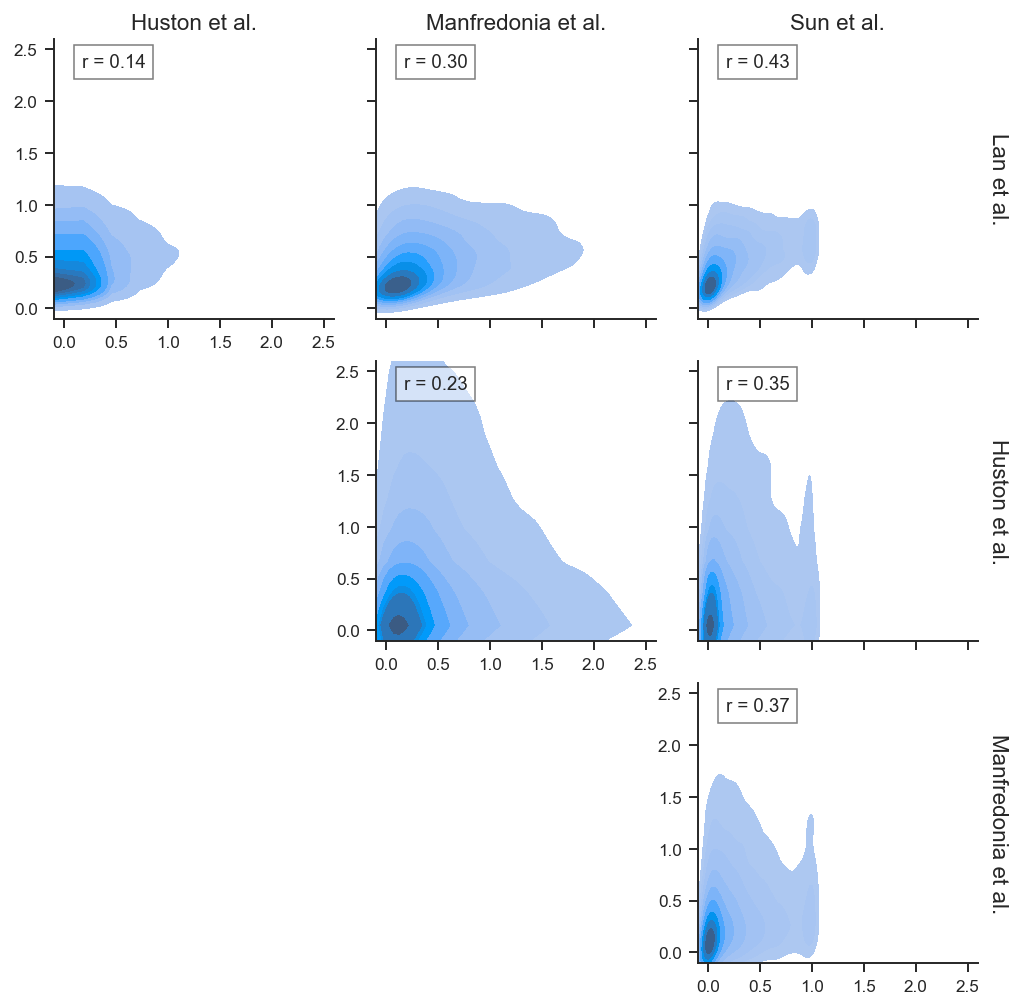

In [6]:
plot = rnav.plot_linreg(
    samples=[lan, huston, manfredonia, sun],
    profile="shapemap",
    scale='linear',
    kde=True,
    colorbars=False,
    )
for row in plot.axes:
    for ax in row:
        ax.set(
            xlim=(-0.1, 2.6),
            ylim=(-0.1, 2.6),
            xticks=[0, 0.5, 1.0, 1.5, 2.0, 2.5],
            yticks=[0, 0.5, 1.0, 1.5, 2.0, 2.5],
        )
# plot.save("pairwise_regression.svg")


## Compare structure models

These 4 studies ultimately resulted in 4 different structure models, all based on in-cell structure probing experiments which differed at every experimental and computational step.
For each structure we compute the percentage of base pairs predicted by 1, 2, 3 or 4 studies.
Overall, these studies agree on many base-pairs, despite differences in experimental design.

Text(0.5, 1.0, 'Percent that appear in other studies')

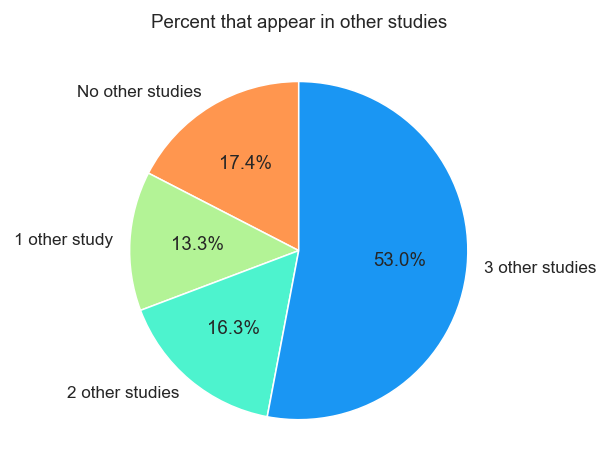

In [7]:

structure_comparison = rnav.data.StructureCompareMany(
    input_data=[
        lan.get_data("ss"),
        huston.get_data("ss"),
        manfredonia.get_data("ss"),
        sun.get_data("ss")
        ],
    sequence=lan.get_data("ss"),
    )
df = structure_comparison.data
orf1 = df.eval("i > 266 & j < 21555")
percentages = [sum(df.loc[orf1, "Num_structures"] == i)*(i+1) / sum(orf1)
               for i in [0, 1, 2, 3]]

import matplotlib.pyplot as plt

plt.pie(
    x=percentages,
    labels=["No other studies", "1 other study", "2 other studies", "3 other studies"],
    colors=structure_comparison._metric["cmap"],
    startangle=90,
    autopct='%1.1f%%')
plt.title("Percent that appear in other studies")

# plt.savefig("pie_chart.svg")


## Visualize structure models

To visualize these structure models, we employ `rnav.plot_arcs()` to display arc plots with each base-pair represented as an arc and colored by how many models predict it.
To limit the size of these plots, we only visualize nucleotides 1-3000 and 3001-6000 using the `region` argument.

Each group choose a different value for the max pairing distance parameter provided to the folding algorithm, which limits the similarity seen between structure models.
These limits are displayed on this plot using the Matplotlib interface of the RNAvigate plot.
Each dashed line represents the maximum height of an arc reported by one of the studies.

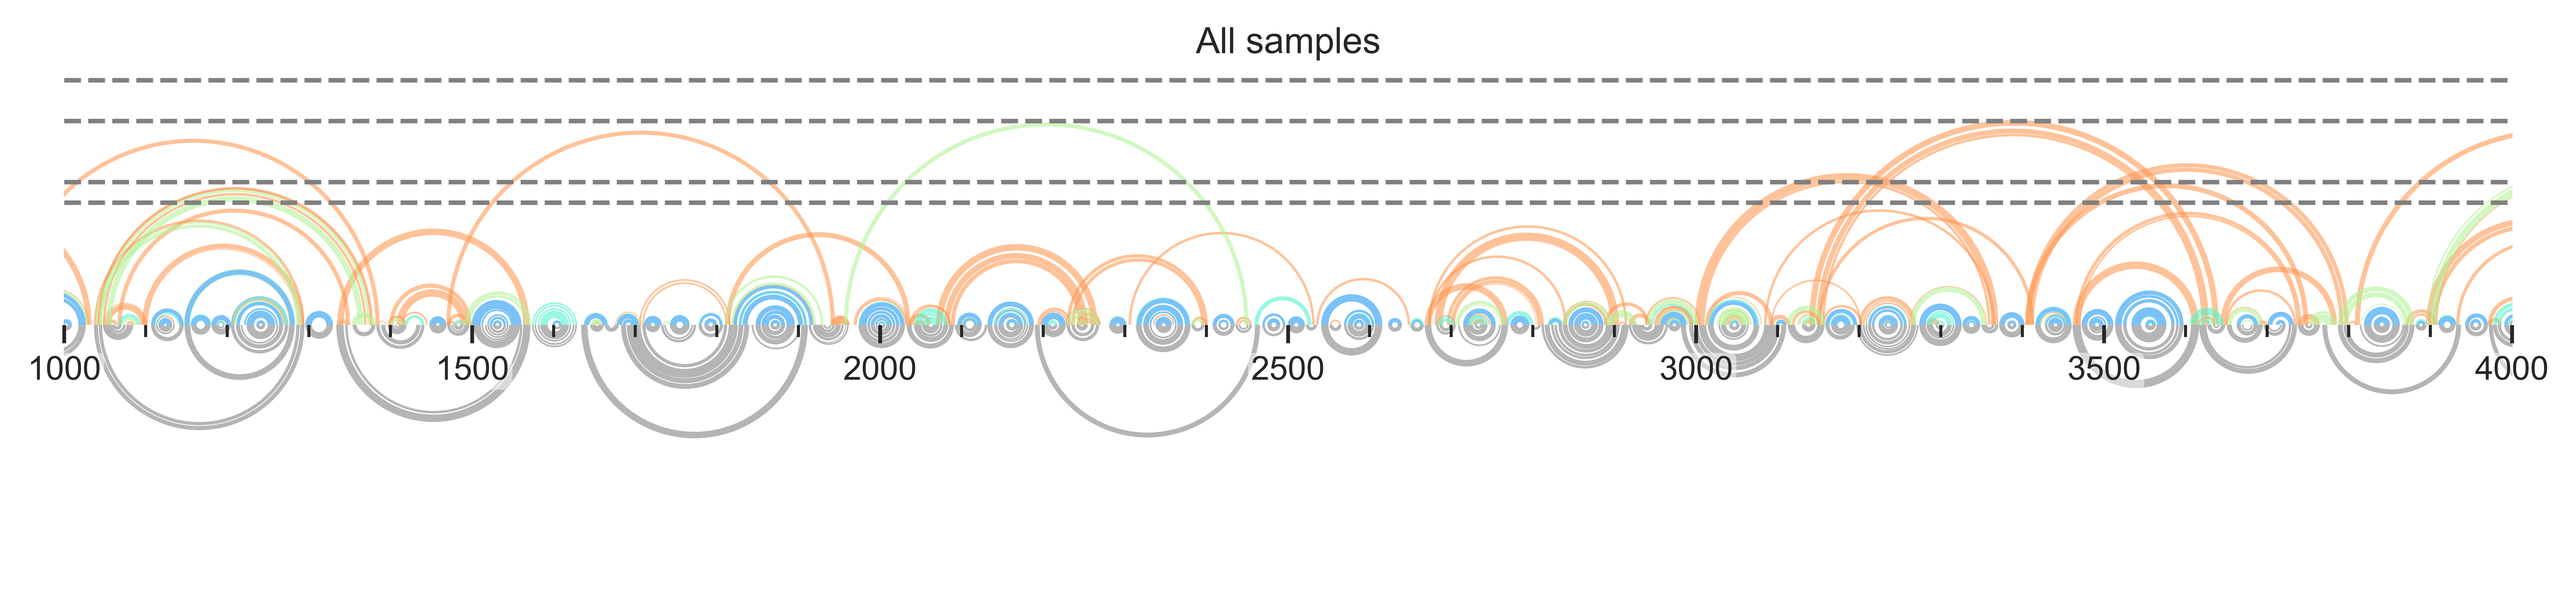

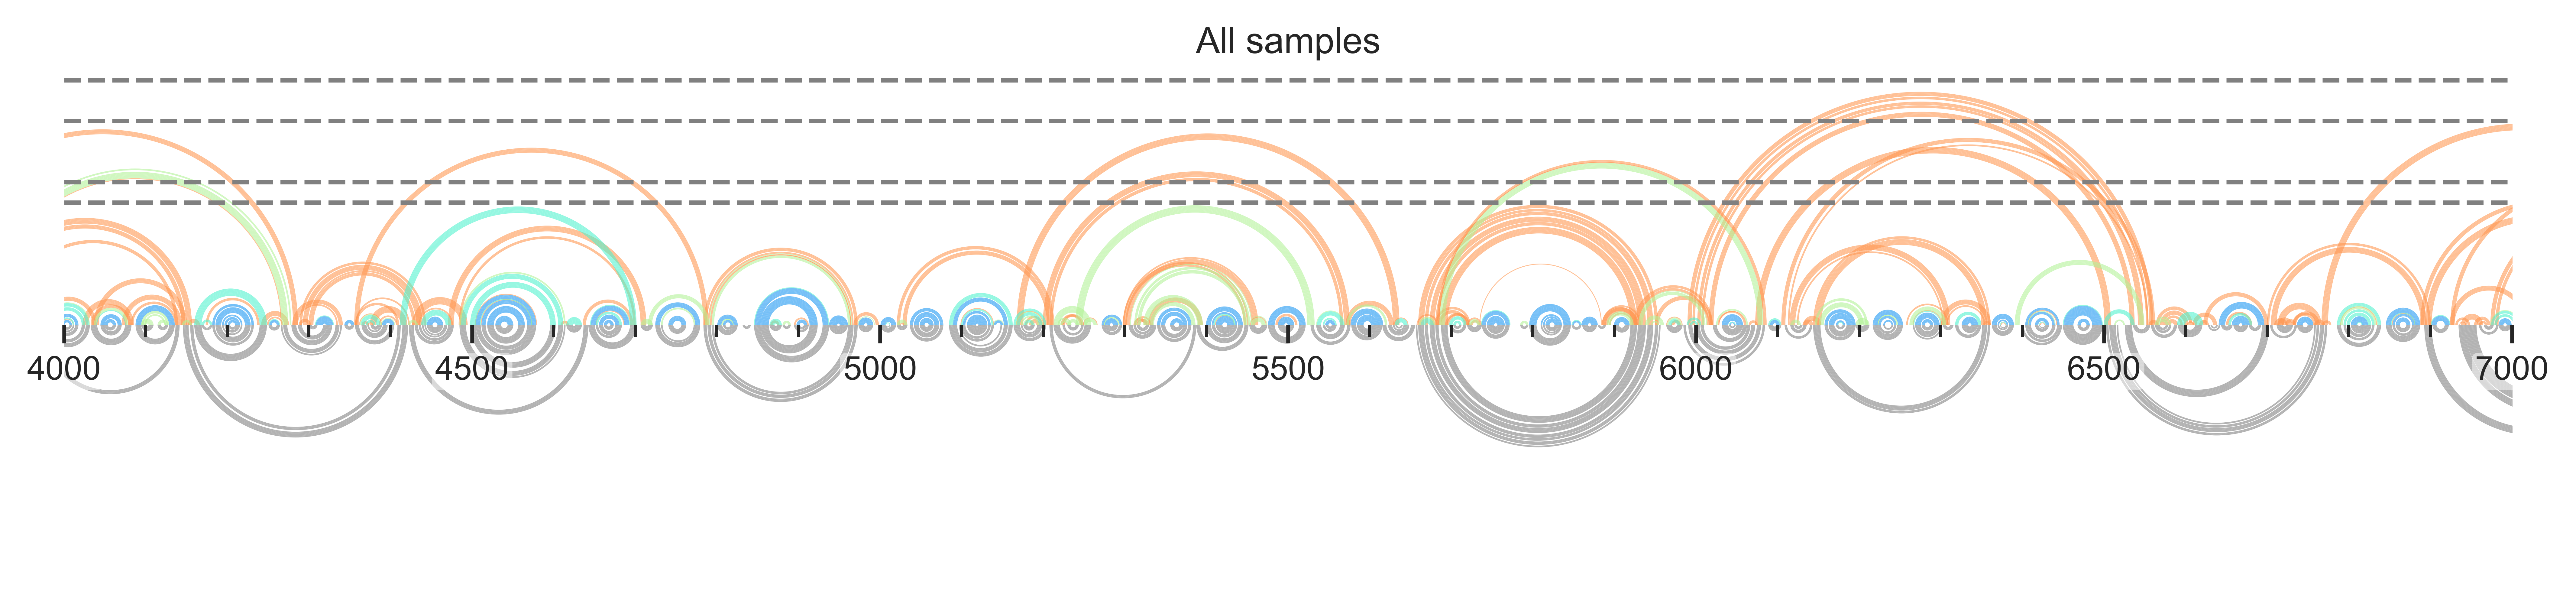

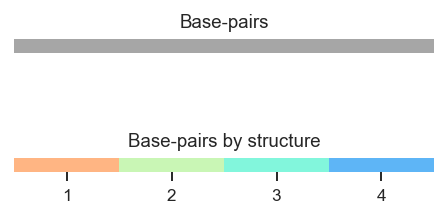

In [8]:
rnav.styles.set_defaults(dpi=900)

for start, end in [[1000, 4000], [4000, 7000]]:
    plot = rnav.plot_arcs(
        samples=[lan],
        labels=["All samples"],
        sequence=structure_comparison,
        structure=de_novo.get_data("ss"),
        interactions=structure_comparison,
        panels={"interactions": "top",
                "structure": "bottom"},
        region=[start, end],
        seqbar=False,
        colorbars=False,
        nt_ticks=(500, 100),
        )
    ax = plot.axes[0, 0]
    ax.set(ylim=(-305, 305))
    for pairing_distance in [350, 300, 500, 600]:
        ax.plot(
            [start, end], [pairing_distance/2, pairing_distance/2],
            color="grey", ls="--"
            )
    plot.set_figure_size(height_ax_rel=0.003, width_ax_rel=0.003)
    # plot.save(f"ss_compare_{start}_{end}.svg")

rnav.styles.set_defaults(dpi=140)

cb_plot = plot.plot_colorbars()
# cb_plot.save("ss_compare_colorbar.svg")
